In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [58]:
df=pd.read_csv("iris.txt",header=None)
df.columns=["x1","x2","x3","x4","y"]
X=df.drop("y",axis=1).values.astype(float)
X=X.T
iris_plant={}
def str_to_num(iris):
    if not iris_plant.get(iris):
        iris_plant[iris]=len(iris_plant)+1
    return iris_plant[iris]

df["y_encode"]=df["y"].apply(str_to_num)
Y=df["y_encode"].values.astype(int)
print(Y)
print(X.shape)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]
(4, 150)


#### PART(A)  ####

In [59]:
xmeans=np.mean(X,axis=1,keepdims=True)
X=X-xmeans
print(X)
print(X.shape)

[[-7.43333333e-01 -9.43333333e-01 -1.14333333e+00 -1.24333333e+00
  -8.43333333e-01 -4.43333333e-01 -1.24333333e+00 -8.43333333e-01
  -1.44333333e+00 -9.43333333e-01 -4.43333333e-01 -1.04333333e+00
  -1.04333333e+00 -1.54333333e+00 -4.33333333e-02 -1.43333333e-01
  -4.43333333e-01 -7.43333333e-01 -1.43333333e-01 -7.43333333e-01
  -4.43333333e-01 -7.43333333e-01 -1.24333333e+00 -7.43333333e-01
  -1.04333333e+00 -8.43333333e-01 -8.43333333e-01 -6.43333333e-01
  -6.43333333e-01 -1.14333333e+00 -1.04333333e+00 -4.43333333e-01
  -6.43333333e-01 -3.43333333e-01 -9.43333333e-01 -8.43333333e-01
  -3.43333333e-01 -9.43333333e-01 -1.44333333e+00 -7.43333333e-01
  -8.43333333e-01 -1.34333333e+00 -1.44333333e+00 -8.43333333e-01
  -7.43333333e-01 -1.04333333e+00 -7.43333333e-01 -1.24333333e+00
  -5.43333333e-01 -8.43333333e-01  1.15666667e+00  5.56666667e-01
   1.05666667e+00 -3.43333333e-01  6.56666667e-01 -1.43333333e-01
   4.56666667e-01 -9.43333333e-01  7.56666667e-01 -6.43333333e-01
  -8.43333

#### PART(B) ####

In [60]:
d,n=X.shape

### covarience matrix ###
C=(1/n)*(X @ X.T)

egnval,egnvecs = np.linalg.eigh(C)  ## eigh give eigen values in asscending order
egnval=np.flip(egnval)   ### flping to get decending egn values
egnvecs=np.flip(egnvecs,axis=1)   ### flping to get decending egn vectors
V=egnvecs ### eigenvectors
E=np.diag(egnval) ### digonal eigenvalues
print(V) ### d x d
print(E) ### d x d

[[-0.36158968  0.65653988  0.58099728  0.31725455]
 [ 0.08226889  0.72971237 -0.59641809 -0.32409435]
 [-0.85657211 -0.1757674  -0.07252408 -0.47971899]
 [-0.35884393 -0.07470647 -0.54906091  0.75112056]]
[[4.19667516 0.         0.         0.        ]
 [0.         0.24062861 0.         0.        ]
 [0.         0.         0.07800042 0.        ]
 [0.         0.         0.         0.02352514]]


### PART(C) ###

In [61]:
## for Uk selecting top k eigen vectors with largest values
k=2
Uk=V[:,:k] ## first k eigen vectors dxk
W=Uk.T ###  kxd
Ylower=W@X  ## kxd @ dxn == kxn
print(Ylower,Ylower.shape)


[[ 2.68420713  2.71539062  2.88981954  2.7464372   2.72859298  2.27989736
   2.82089068  2.62648199  2.88795857  2.67384469  2.50652679  2.61314272
   2.78743398  3.22520045  2.64354322  2.38386932  2.6225262   2.64832273
   2.19907796  2.58734619  2.3105317   2.54323491  3.21585769  2.30312854
   2.35617109  2.50791723  2.469056    2.56239095  2.63982127  2.63284791
   2.58846205  2.41007734  2.64763667  2.59715948  2.67384469  2.86699985
   2.62522846  2.67384469  2.98184266  2.59032303  2.77013891  2.85221108
   2.99829644  2.4055141   2.20883295  2.71566519  2.53757337  2.8403213
   2.54268576  2.70391231 -1.28479459 -0.93241075 -1.46406132 -0.18096721
  -1.08713449 -0.64043675 -1.09522371  0.75146714 -1.04329778  0.01019007
   0.5110862  -0.51109806 -0.26233576 -0.98404455  0.174864   -0.92757294
  -0.65959279 -0.23454059 -0.94236171 -0.0432464  -1.11624072 -0.35678657
  -1.29646885 -0.92050265 -0.71400821 -0.89964086 -1.33104142 -1.55739627
  -0.81245555  0.30733476  0.07034289  

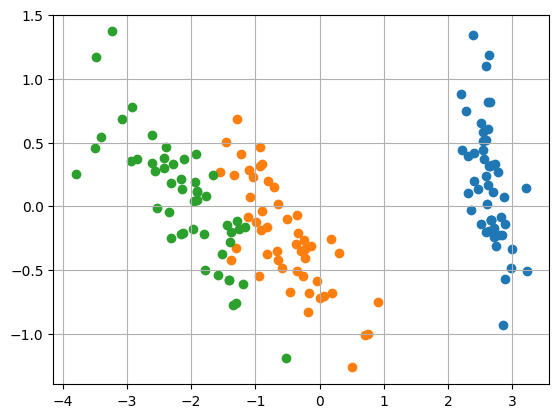

In [62]:
Ylower_T = Ylower.T  # shape now (150, 2)
plt.scatter(Ylower_T[Y==1, 0], Ylower_T[Y==1, 1])
plt.scatter(Ylower_T[Y==2, 0], Ylower_T[Y==2, 1])
plt.scatter(Ylower_T[Y==3, 0], Ylower_T[Y==3, 1])
plt.grid(True)
plt.show()

### PART(D) ###

In [63]:
U=Uk ### dxk
Xreconstruct=U @ Ylower  ### dxk @ kxn == dxn
print(Xreconstruct,Xreconstruct.shape)

[[-7.56150860e-01 -1.09317805e+00 -1.13510179e+00 -1.19734886e+00
  -7.67396262e-01 -3.33438176e-01 -1.07390984e+00 -8.37830869e-01
  -1.41900768e+00 -1.03688200e+00 -4.78312875e-01 -9.30756279e-01
  -1.15742787e+00 -1.49662252e+00 -1.77093678e-01  2.09023207e-02
  -4.11169904e-01 -7.48080212e-01 -2.17905080e-01 -5.93845972e-01
  -5.74248319e-01 -6.30709093e-01 -1.06984468e+00 -7.63507658e-01
  -8.72457483e-01 -9.98133014e-01 -8.02256640e-01 -6.80538757e-01
  -7.44905458e-01 -1.07680299e+00 -1.06555759e+00 -5.96972887e-01
  -4.19006789e-01 -2.16897789e-01 -1.03688200e+00 -9.85997204e-01
  -5.50867107e-01 -1.03688200e+00 -1.39350684e+00 -7.81651697e-01
  -8.23692315e-01 -1.64379340e+00 -1.30363930e+00 -7.41181574e-01
  -5.08043595e-01 -1.14128657e+00 -5.82483688e-01 -1.17184802e+00
  -5.34492047e-01 -9.02197570e-01  9.14586624e-01  5.46716380e-01
   8.60410195e-01 -4.76606043e-01  4.42593406e-01 -4.24141932e-02
   5.82407490e-01 -9.28989771e-01  5.27565050e-01 -4.76770763e-01
  -1.01367

#### PART(E) ####

In [64]:
### reconstruction error
d,n=Xreconstruct.shape
rec_error=(1/n)*np.sum(np.linalg.norm((X-Xreconstruct),axis=0)**2)
print(rec_error)


0.10152555565202216


#### PART(F) ####

In [74]:
from sklearn.cluster import KMeans

class SpectralClustering:
    def __init__(self):
        self.W = None
        self.D = None
        self.L = None
        self.H = None
        self.labels=None
        self.model=None

    def adjacency_matrix(self, X, sigma):
        n = X.shape[0]
        self.W = np.zeros((n, n))
        for i in range(n):
            for j in range(i+1, n):
                dist2 = np.linalg.norm(X[i] - X[j])**2
                val = np.exp(-dist2 / (sigma**2))
                self.W[i, j] = self.W[j, i] = val

    def degree_matrix(self):
        diag = np.sum(self.W, axis=1)
        self.D = np.diag(diag)

    def fit(self, X, sigma, p):
        X=X.T
        self.adjacency_matrix(X, sigma)
        self.degree_matrix()
        self.L = self.D - self.W
        eigvals, eigvecs = np.linalg.eigh(self.L)
        idx = np.argsort(eigvals)
        self.H = eigvecs[:, idx[:p]]
        self.model=KMeans(n_clusters=p)
        self.model.fit(self.H)
        self.labels=self.model.labels_+1


In [ ]:
def Performance(labels,x):
    

In [66]:
beforemodel=SpectralClustering()
beforemodel.fit(X,1,3)
print(beforemodel.labels)


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3
 3 3 3 3 3 3 1 1 3 3 3 1 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1
 1 1 1 1 1 1 3 3 1 1 1 3 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


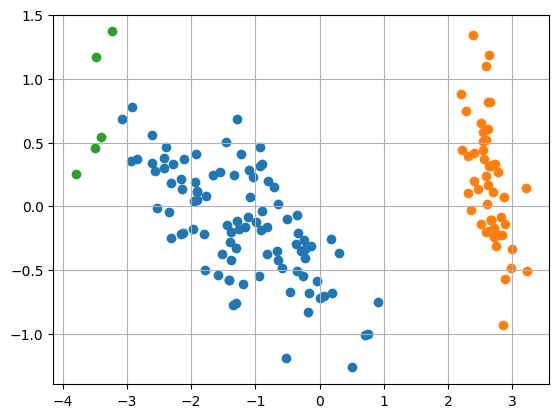

In [ ]:
aftermodel=SpectralClustering()
aftermodel.fit(Ylower,1,3)
afterlabels=aftermodel.labels
print(afterlabels)

plt.scatter(Ylower_T[afterlabels==1, 0], Ylower_T[afterlabels==1, 1])
plt.scatter(Ylower_T[afterlabels==2, 0], Ylower_T[afterlabels==2, 1])
plt.scatter(Ylower_T[afterlabels==3, 0], Ylower_T[afterlabels==3, 1])
plt.grid(True)
plt.show()

